***

# Final Exam Solution

## FINM 37400 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

Thanks to
* Jeremy Bejarano
* Jordan Sacks

***

# <span style="color:red">Solutions</span>

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

### <span style="color:red">Solution Option</span>

Choose whether to use the discounts solved from 2.2 or provided in the file 

`simplified_spot_discounts_2022-12-30.xlsx`

In [2]:
USE_SIMPLIFIED_SPOT = False

# Instructions

## Please note the following:

Points
* The exam is 180 points.
* You have 180 minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.
Final Exam

Submission
* You will upload your solution to the Final Exam assignment on Canvas, where you downloaded this.
* Your submission should be readable, (the graders can understand your answers,) and it should include all code used in your analysis in a file format that the code can be executed. (ie. .ipynb preferred, .pdf is unacceptable.)

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation, (only for this exam.)

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:

### Sections 2, 3, 4
* `treasury_ts_2020-08-15.xlsx`

If you get stuck on 2.2, you can replace that answer with the data in 
* `simplified_spot_discounts_2022-12-30.xlsx`

But if you solve 2.2, then you'll have no use/need of this data.

### Section 5
* `treasury_ts_2020-08-15.xlsx`

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 50     |
| 2       | 25     |
| 3       | 35     |
| 4       | 20     |
| 5       | 50     |

# 1. Short Answer

### No Data Needed

These problem does not require any data file. Rather, analyze the situation conceptually, based on the information below. 

A few questions may require simple arithmetic.

## 1.1 (5pts)

True or False: The spot rate prices a particular security, and YTM prices any cashflow at a particular maturity.

Explain your answer.

## 1.2 (5pts)

Suppose the duration of a bond is 7.0. The current price of the bond is 99.8 and the YTM of the bond is 3.27\%. 

The spot-rate curve moves up in a parallel shift by 10bps. 

* What is the approximate price of the bond after the shift?

* Do you suspect this approximation is an underestimate or overestimate? 

## 1.3 (5pts)

Are duration-based approximations of bond prices more accurate for a Treasury with high coupon rate or low coupon rate, (holding other things, like time-to-maturity, equal?)

## 1.4 (5pts)

Which tend to be less smooth: spot curves or forward curves? 

Explain.

## 1.5 (5pts)

True or False: Bond prices and returns have nearly zero serial correlation.

Explain your answer.

## 1.6 (5pts)

As of Dec 2022, the yield curve is "inverted"?

Does this inversion mathematically imply that expected future spot rates will decline, or is there potentially another explanation?

## 1.7 (5pts)

Suppose we want to estimate a discount curve from a set of Treasuries.

If there are dates where multiple treasuries pay a coupon yet none expire, which of our estimation methods have trouble?
* Bootstrap
* OLS
* Nelson-Siegel

Explain.

## 1.8 (5pts)

Suppose that yesterday you built a position
* long a 10-year floating-rate note that resets quarterly
* short a 5-year floating-rate note that resets annually

Is your duration positive or negative? How about four years from today?

Explain.

## 1.9 (10pts)

### Situation
Suppose it is Aug 15, 2022. We observe the following annual rates, (semiannually compounded):
* 7-year T-note (newly issued) has a price of par, with a coupon of 3.50%.
* 7-year swap (semi-annual, SOFR) has a swap rate of 3.00%.

*Assume the floating leg equals the repo rate and timing.*

### 1.9.1
**Conceptually**, explain the short and long positions you would take (on notional of \\$100 million) in order to try to profit on this spread **diverging** further, meaning the treasury rate going higher relative to the swap rate.

### 1.9.2

Suppose that it is February 15, 2023, immediately after the swap has reset and the cashflows of the trade were settled.

In the market, we observe the following:
* The 5-year swap rate is 3.50%.
* The 5-year Treasury has a yield-to-maturity of 4.25%. 

**Conceptually**, How has the value changed between over the six months of each component of the trade?
* swap 
* T-note

***

# <span style="color:red">Solution 1</span>

#### <span style="color:green">RUBRIC</span>

1.1

- 2 pts for FALSE
- 1.5 pts for correct explanation on YTM. Must mention that YTM is defined for a particular security or a function of the security's price
- 1.5 pts for correct explanation on spot curve. Must mention that the spot curve identifies discounts/factors/rates so that it can price any cashflow

1.2

- 3pts for calculating the approximate price correctly
- 2pts for identifying it is an underestimate and correct explanation (-1pt if explanation is incorrect. Must mention the nonlinearity of the price-to-ytm relationship or that a general property of duration is that it is an underestimate.

1.3

- 2 pts for specifying larger coupons
- 3 pts for correct explanation. Must specify either (1) larger coupons have less convexity (2) nonlinearity of compounding discount rates

1.4

- 2 pts for correctly specifying forward curves as less smooth. 
- 3 pts for correct explanation. Must mention the extraction of forward curves from spot curves and the increase in error estimation that arises. This can be explained via a class example.

1.5

- 2 pts for FALSE
- 3 pts for correct explanation. Must mention the path of returns when held to maturity and how it is serially correlated with prior returns

1.6

- 2 pts for specifying NO
- 3 pts for correct explanation. Must mention either (1) that the expectations hypothesis does not hold or is not a mathematical certainty (2) the shape of the yield curve is an expression of term premia and not forecast of future rates

1.7

- 1.5 pts for specifying Bootstrap
- 1.5 pts for specifying OLS
- 2 pts for correct explanation. Must mention that the system of equations is undetermined or multicollinearity issues(1pt) and Nelson-Siegal is based on a few parameters and thus can be estimated from a partial set (1pt)

1.8

- 1.5pts for specifying negative duration
- 1.5pts for specifying that it is unchanged 4 years later
- 2 pts for correct explanation. Must mention that FRNs duration is based on time-to-reset

1.9

- 5 pts for correctly specifying the positions taken in 1.9.1
- 2 pts for correctly specifying that the T-note has decreased in value / price decreased leading to a net profit on this component (1 pt) and fixed-receiving swap has decreased in value (1pt).
- 3 pts for mentioning atleast 2 of the "excellent answer notes" listed above (1.5pts each). 

## <span style="color:red">1.1</span>

False.

YTM is defined for a particular security, and it is simply another way of stating the security's price, (and thus can be used to price the security.)

The spot curve gives discounts (factors or rates) for any (risk-free) cashflow at a particular maturity. Thus, the spot curve is useful in pricing any cashflow.

## <span style="color:red">1.2</span>

Recall the approximation:

$$P_{\text{new}} - P_{\text{old}} =  - P_{\text{old}}D dr $$

#### Caution

The problem did not state the compounding frequency of the provided YTM. Typically, this is understood as semiannual, but fine if someone assumed a different compounding. The calculation below allows the FREQ parameter to adjust that.

In [3]:
FREQ = 2

duration = 7
px = 99.8
ytm = .0327
shift = .0010

mod_duration = duration / (1+ytm/FREQ)

px_new = px * (1 - mod_duration * shift)

display(f'The new price as estimated by modified duration is: {px_new:.2f}.')

'The new price as estimated by modified duration is: 99.11.'

**It is an underestimate of the true price.**

This is due to the nonlinearity (convexity) of the price-to-ytm relationship.

## <span style="color:red">1.3</span>

Duration-approximated price will be more accurate for bonds where the convexity term is small.

Bonds with larger coupons have less convexity, given that the nonlinearity of compounding discount rates has less time to operate on near-term cashflows.

#### Pedagogical point

This is seen in an extreme form in the amortized bond of Problem 3 below.

## <span style="color:red">1.4</span>

As discussed, forward curves tend to be less smooth than spot curves. In particular, this was relevant in that even if OLS extracts a reasonably behaved spot curve, we discussed that it often implies an unreasonably behaved forward curve.

## <span style="color:red">1.5</span>

False.

We saw in W.2. that bond prices (and returns) are NOT like equities, but rather have substantial serial correlation. 

In particular, if the bond price goes up unexpectedly high today, its growth in the future must be lower than was originally expected. This is due to the fixed end point of the price at maturity.

## <span style="color:red">1.6</span>

No, the inverted yield curve may be a statistical signal of declining spot rates, but it is not a mathematical certainty.

This is because there is a term premium in bonds, and thus the expectations hypothesis does not hold exactly. It is possible for a declining yield curve to be an expression of term premia rather than a declining forecasted spot rate. This is at the crux of the issue in the final case study.

## <span style="color:red">1.7</span>

Bootstrap and OLS will both fail.

Nelson-Siegel will be okay.

The issue for Bootstrap and OLS is that this cashflow matrix means the system of linear equations is undetermined. The discounts at the dates without maturities are unidentified by this system.

Nelson-Siegel does not have this problem, as with a few parameters, it sets the entire discount curve. These parameters can be estimated from a partial set of maturities, (though it may fit the other maturities poorly.)

## <span style="color:red">1.8</span>

Floating-Rate Notes (FRNs) do not have duration built on time-to-maturity, but rather time-to-reset.

Thus, the annually resetting FRN has the longer duration, notwithstanding its shorter time-to-maturity.

This logic is not changed four years later. 

Thus, at both times, **your position has negative duration**. (That is, the short position has more duration than the long position.)

## <span style="color:red">1.9</span>

To position for further divergence...
* short $100 million notional of the T-note 
* enter a fixed-receiving swap

In Aug 2023,
* T-note has **decreased** in value
* fixed-receiving swap has decreased in value

#### An excellent answer should note

1. **Net PnL**, given the divergence of the spread, the decrease in the short position on the T-note should provide more than enough profit to offset the loss on the fixed-receiving swap, thus providing a net profit.

1. Aside from the PnL on the positions as of Aug 15, there is also a **cashflow issue**. The coupon paid on the T-note will be further cash outflow given that the fixed swap payment will not fully offset it.

1. **Shorting via reverse repo**. We short the T-note by entering into a reverse repo, where we purchase the notes from the repo counterparty and immediately sell them. We will later need to repurchase them at a market price in order to sell them back to the repo party at the previous market price.

***

# 2 Basic Pricing

Use the selected treasury quotes in the file, `selected_treasury_quotes_quotes_2022-12-30.xlsx`.

Data is provided on 10 Treasury issues which mature every six months over the next five years.

*You are welcome to assume that the issues mature in exactly half-year increments, notwithstanding that in actual trading they may have day-count issues causing them to be slightly above/below half-year increments.*

## 2.1 (5pts)

Calculate the cashflow matrix for the treasury issues.

Display the table.

## 2.2 (5pts)

Use the bootstrap (or OLS) to extract the spot discount factors from this data, over the maturity range of 0.5 to 5, in half-year increments.

### Note: If you couldn't extract spot discount factors...

Several problems below make use of the spot discounts on Dec 30, 2022.

**If you were unable to calculate the answer to 2.3,** feel free to use the simplified discount factors, $Z(t,T)$ provided in the file `simplified_spot_discounts_2022-12-30.xlsx`.

Note that the rates in this file are simplified and won't match the answer you'll get if you solve Problem 2.2 above, so don't try to check your answer with them.

If you are proceeding with the simplified rates rather than your estimates in 2.2, **state that clearly.**

And again, this is **just provided as a help for anyone who couldn't solve 2.2**, so that they can continue with 2.3-2.5, as well as other problems in the exam.

## 2.3 (5pts)

Report the 
* semi-annually-compounded spot discount **rates** derived from the discount factors above.
* continuously-compounded spot rates.

## 2.4 (3pts)

Without any calculation, just looking at your spot rates from 2.3, is the long-end of the forward curve below or above the spot-rate curve? How do you know?

## 2.5 (7pts)
Calculate and report the continuously-compounded forward-rate curve, $f(t,T,T+1)$, for $0\le T \le 4$.

Also report the forward rate, $f(t,T_1,T_2)$, for $T_1=3, T_2=5$.

***

# <span style="color:red">Solution 2</span>

#### <span style="color:green">RUBRIC</span>

2.1

- 4 pts for correct cashflow matrix
- 1 pt for adding the principle back at the maturity date

2.2

- 2 pts for correct maturities
- 3 pts for correct discount factors

2.3

- 2.5pts for correct semiannual spot rates
- 2.5pts for correct continous spot rates

2.4

- 1 pts for correctly specifying that the forward curve is below the spot curve
- 2 pts for correct explanation about the spot curve decreasing over the long rates

2.5

- 2 pts for correct interval
- 3 pts for correct continous forward rates. Full pts will be given if incorrect interval is used but the forward rates are calculated correctly using this erroneous interval.
- 2 pts for correct $f(t,3,5)$ Like the above, 1 pt will be provided if steps prior were incorrect but steps for calculating this forward rate is correct

In [4]:
filepath = '../data/selected_treasury_quotes_2022-12-30.xlsx'
quotes = pd.read_excel(filepath, sheet_name='quotes').set_index('KYTREASNO')
quotes

,issue date,maturity date,maturity,coupon rate,price,ytm
KYTREASNO,,,,,,
206990,2016-06-30,2023-06-30,0.498289,1.375,98.460938,0.044952
207047,2016-12-31,2023-12-31,1.002053,2.250,97.585938,0.046915
207374,2019-06-30,2024-06-30,1.500342,1.750,95.851562,0.045942
207166,2017-12-31,2024-12-31,2.004107,2.250,95.859375,0.043822
207224,2018-06-30,2025-06-30,2.499658,2.750,96.429688,0.042295
207652,2020-12-31,2025-12-31,3.003422,0.375,89.378906,0.041313
207731,2021-06-30,2026-06-30,3.498973,0.875,89.460938,0.041003
207821,2021-12-31,2026-12-31,4.002738,1.250,89.562500,0.040628
207561,2020-06-30,2027-06-30,4.498289,0.500,85.562500,0.040027


## <span style="color:red">2.1</span>

In [5]:
QUOTE_DATE = '2022-12-30'
t_date = pd.to_datetime(QUOTE_DATE)


CF = pd.DataFrame(data=0, index=quotes.index, columns=quotes['maturity date'])

for i in quotes.index:
    coupon_dates = get_coupon_dates(t_date,pd.to_datetime(quotes.loc[i,'maturity date']))

    if coupon_dates is not None:
        CF.loc[i,coupon_dates] = quotes.loc[i,'coupon rate']/2

    CF.loc[i,quotes.loc[i,'maturity date']] += 100

CF = CF.resample('m',axis=1).sum()
CF.drop(columns=CF.columns[(CF==0).all()],inplace=True)
CF = CF.fillna(0).sort_index(axis=1)
CF

maturity date,2023-06-30,2023-12-31,2024-06-30,2024-12-31,2025-06-30,2025-12-31,2026-06-30,2026-12-31,2027-06-30,2027-12-31
KYTREASNO,,,,,,,,,,
206990,100.6875,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207047,1.1250,101.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207374,0.8750,0.8750,100.8750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207166,1.1250,1.1250,1.1250,101.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207224,1.3750,1.3750,1.3750,1.3750,101.3750,0.0000,0.0000,0.0000,0.0000,0.0000
207652,0.1875,0.1875,0.1875,0.1875,0.1875,100.1875,0.0000,0.0000,0.0000,0.0000
207731,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,100.4375,0.0000,0.0000,0.0000
207821,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,100.6250,0.0000,0.0000
207561,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,100.2500,0.0000


## <span style="color:red">2.2</span>

In [6]:
COMPOUNDING = 2

if USE_SIMPLIFIED_SPOT:
    filepath = '../data/simplified_spot_discounts_2022-12-30.xlsx'
    spot = pd.read_excel(filepath, sheet_name='data').set_index('maturity')

else:
    spot = pd.DataFrame(np.linalg.solve(CF,quotes['price'].loc[CF.index]), index=CF.index, columns=['discount factor'])
    spot.insert(0,'maturity',quotes['maturity'])
    spot = spot.reset_index(drop=True).set_index('maturity')    

spot

,discount factor
maturity,
0.498289,0.977886
1.002053,0.954124
1.500342,0.933443
2.004107,0.916052
2.499658,0.899927
3.003422,0.883355
3.498973,0.866473
4.002738,0.850116
4.498289,0.835333


## <span style="color:red">2.3</span>

In [7]:
spot['semiannual'] = discount_to_intrate(spot['discount factor'], spot.index, n_compound=COMPOUNDING)
spot['continuous'] = discount_to_intrate(spot['discount factor'], spot.index, n_compound=None)
spot

,discount factor,semiannual,continuous
maturity,,,
0.498289,0.977886,0.045384,0.044877
1.002053,0.954124,0.047419,0.046865
1.500342,0.933443,0.046437,0.045907
2.004107,0.916052,0.044233,0.043751
2.499658,0.899927,0.042630,0.042182
3.003422,0.883355,0.041725,0.041296
3.498973,0.866473,0.041384,0.040962
4.002738,0.850116,0.040982,0.040568
4.498289,0.835333,0.040401,0.039998


### <span style="color:red">Extra Plots</span>

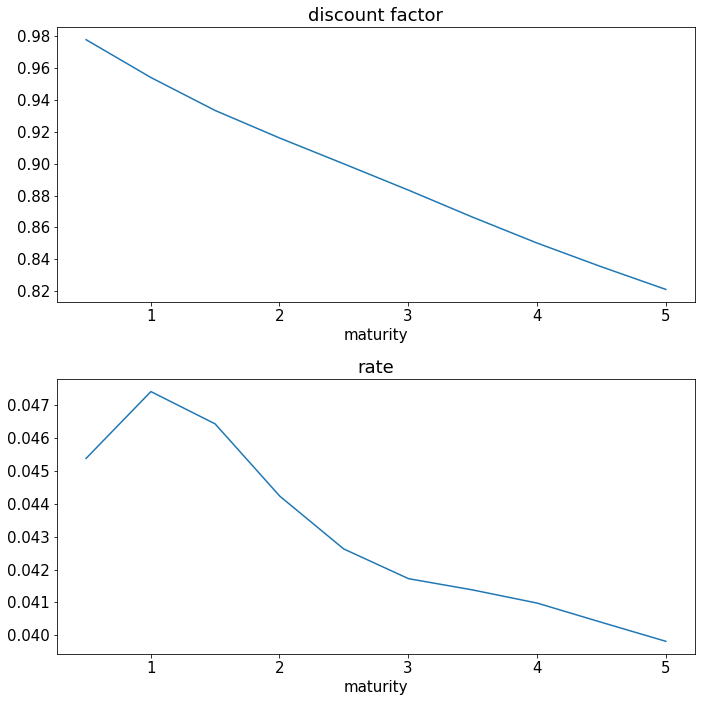

In [8]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
spot['discount factor'].plot(ax=ax[0],title='discount factor')
spot['semiannual'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

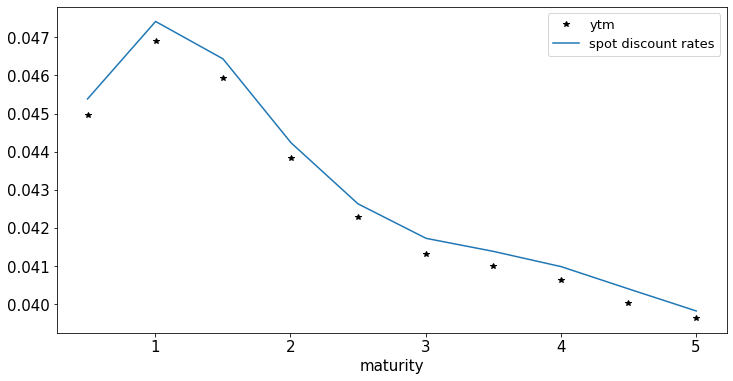

In [9]:
ax = quotes.set_index('maturity')['ytm'].plot(linestyle='',marker='*',color='k');
spot['semiannual'].plot(ax=ax);
ax.legend(['ytm','spot discount rates']);

## <span style="color:red">2.4</span>

The spot curve is decreasing over the long rates.

Thus, we know the forward curve must be below the spot curve at the long end.

## <span style="color:red">2.5</span>

### Careful

#### Interval
The question asks for forward interval equal to one year, (2 "periods" of six months each.)

The question in HW 4 asked about a forward interval of just half a year. So repeating that code would lead to a wrong answer.

The code below accounts for this with the variable `FORWARD_INTERVAL`, which is expressed in number of periods, not number of years. Thus, an interval of one year is a `FORWARD_INTERVAL=2`.

#### Compounding
The question asks for a **continuously** compounded forward. That is reported below, though a semiannual rate is also reported below.

In [10]:
FORWARD_INTERVAL = 2

forward = pd.DataFrame(spot['discount factor']/spot['discount factor'].shift(FORWARD_INTERVAL),index=spot.index, columns=['discount factor'])
forward['discount factor'].iloc[FORWARD_INTERVAL-1] = spot['discount factor'].iloc[FORWARD_INTERVAL-1]
forward['semiannual'] = -np.log(forward['discount factor']) / forward.index.to_series().diff(FORWARD_INTERVAL).mean()
forward['continuous'] = -np.log(forward['discount factor']) / forward.index.to_series().diff(FORWARD_INTERVAL).mean()
forward

/Users/markhendricks/Projects/FINM/finm-fixedincome-2023/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/markhendricks/Projects/FINM/finm-fixedincome-2023/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,discount factor,semiannual,continuous
maturity,,,
0.498289,NaN,NaN,NaN
1.002053,0.954124,0.046961,0.046961
1.500342,0.954551,0.046514,0.046514
2.004107,0.960097,0.040721,0.040721
2.499658,0.964095,0.036566,0.036566
3.003422,0.964307,0.036346,0.036346
3.498973,0.962825,0.037883,0.037883
4.002738,0.962372,0.038354,0.038354
4.498289,0.964062,0.036600,0.036600


### Two-year forward rate

$F(t,T_1,T_2)$ and $f(t,T_1,T_2)$ for $T_1=3, T_2=5$.

In [11]:
FWD_INTERVAL = 4
F_2 = spot['discount factor'].iloc[-1] / spot['discount factor'].iloc[-1-FWD_INTERVAL]
f_2 = -np.log(F_2) / (FWD_INTERVAL/2)

fwd_2 = pd.DataFrame(np.array([[F_2,f_2]]),index=['T_1=3, T_2=5'],columns=['F','f'])
fwd_2.style.format({'F':'{:.6f}','f':'{:.4%}'})

,F,f
"T_1=3, T_2=5",0.929424,3.6595%


### <span style="color:red">Extra Plots</span>

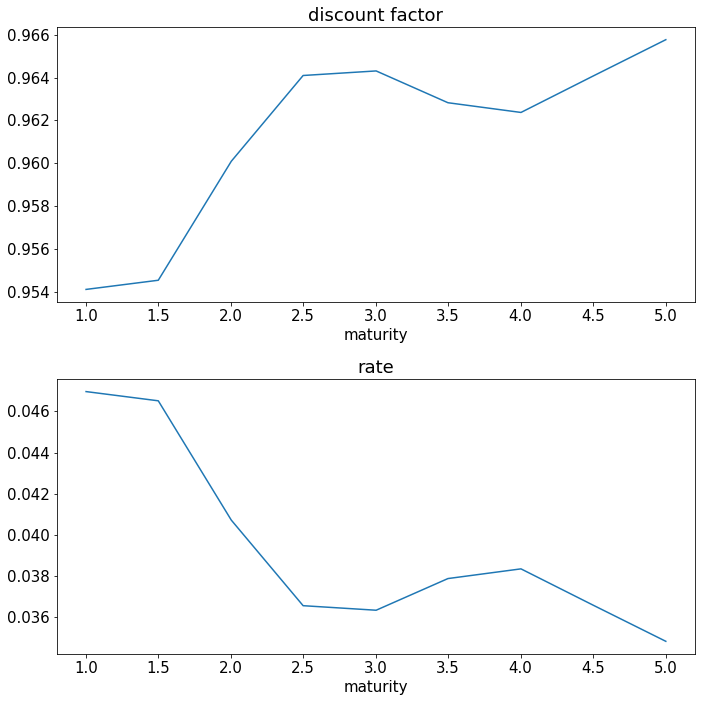

In [12]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
forward['discount factor'].plot(ax=ax[0],title='discount factor')
forward['continuous'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

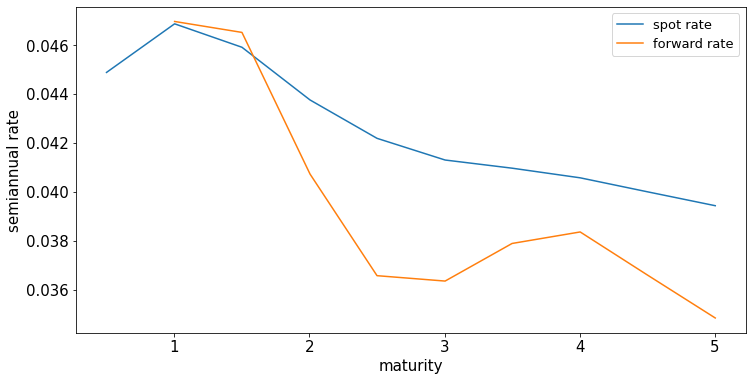

In [13]:
fig, ax = plt.subplots()
spot['continuous'].plot(ax=ax)
forward['continuous'].plot(ax=ax)
plt.legend(['spot rate','forward rate'])
plt.ylabel('semiannual rate')
plt.show()

***

# 3 An Amortized Bond

Suppose the Treasury announces a new type of bond, the **zero-coupon amortized bond** which works as follows:
* it pays the \\$100 face value evenly and annually over the life of the bond.
* it does not pay any additional coupon.

In particular, consider a five-year amortized bond:
* it pays \\$10 twice per year for the next 5 years.
* it does **not** pay any extra principal when it matures at 5 years--just the usual \\$10 payment.

## 3.1 (5pts)

Use the spot discount factors from Problem 2 to price this new security as of December 30, 2022.

## 3.2 (5pts)

Calculate the YTM of this new **amortized bond**.

## 3.3 (5pts)

Conceptually speaking, should the duration of this amortized bond be higher or lower than a typical zero-coupon, five-year treasury bond?

And its convexity?

## 3.4 (7pts)

Calculate the (Macauley) duration of this **amortized** bond.

## 3.5 (6pts)

Calculate the convexity of this amortized bond.

## 3.6 (7pts)

Suppose you want to go long this amortized bond but hedge your duration by shorting the 5-year Treasury reported in `selected_treasury_quotes_quotes_2022-12-30.xlsx`.

For each long contract of the 5-year amortized, how many contracts should you short of the vanilla 5-year Treasury?

***

# <span style="color:red">Solution 3</span>

#### <span style="color:green">RUBRIC</span>

3.1 (5 points)
  - 0 points: Blank or essentially no meaningful progress
  - 3 points: On the right track, but answer is significantly off
  - 5 points: Correct answer within a rounding error
 
3.2 (5 points)
  - 0 points: Blank or essentially no meaningful progress
  - 3 points: On the right track, but answer is significantly off
  - 5 points: Correct answer within a rounding error

3.3 (5 points)
  - 0 points: Blank or substantially irrelevant response
  - 3 points: Correct answer and reasoning for one of two concepts
  - 5 points: Correct answer and reasoning for both duration and convexity
 
3.4 (7 points)
  - 0 points: Blank or essentially no meaningful progress
  - 4 points: On the right track, but answer is significantly off 
  - 7 points: Correct answer within a rounding error
 
3.5 (6 points)
  - 0 points: Blank or essentially no meaningful progress
  - 3 points: On the right track, but answer is significantly off 
  - 6 points: Correct answer within a rounding error
 
3.6 (7 points)
  - 0 points: Blank or essentially no meaningful progress
  - 4 points: On the right track, but answer is significantly off 
  - 7 points: Correct answer within a rounding error

## <span style="color:red">3.1</span>

In [14]:
p_amort = (spot['discount factor'] * 10).sum()
display(f'Price of amortized bond: ${p_amort:.2f}')

'Price of amortized bond: $89.38'

## <span style="color:red">3.2</span>

#### Caution
The problem supposed that semiannual compounding was the obvious choice for reporting, (as is typical with semiannual-coupon-paying Treasury securities.) Still, the problem did not specify the compounding to use for the YTM, so any reasonable compounding will be accepted. The solution below displays annual, semiannual, daily, and continuous.

#### Coding
This could be solved with almost identical code to the YTM solver used in Solution 1.

In [15]:
from scipy.optimize import fsolve

def pv(rate, cashflows, maturities,freq=1):
    price = sum([cfi/(1+rate/freq)**(maturities[i]*freq) for i, cfi in enumerate(cashflows)])
    return price

In [16]:
ytm = pd.DataFrame(index=['amortized bond'],columns=['annual','semiannual','daily','continuous'],dtype=float)

pv_wrapper = lambda y: p_amort - pv(y,10 * np.ones((10,1)),spot.index,freq=2)
ytm['semiannual'] = fsolve(pv_wrapper,.01)

ytm['annual'] = compound_rate(ytm['semiannual'],2,1)
ytm['daily'] = compound_rate(ytm['semiannual'],2,365)
ytm['continuous'] = compound_rate(ytm['semiannual'],2,None)
ytm.style.format('{:.4%}')

,annual,semiannual,daily,continuous
amortized bond,4.2340%,4.1901%,4.1470%,4.1468%


## <span style="color:red">3.3</span>

#### Duration
**The duration of this amortized bond is much smaller (nearer zero)** than for a zero-coupon 5-year Treasury note. 

#### Convexity
**The convexity of this amortized bond is much smaller (nearer zero)** than for a zero-coupon 5-year Treasury note.

#### Explanation
This question relies on understanding the nonlinear relationship between price and interest-rates, as shown in the first figure of W.1. The longer maturity (or smaller coupon rate) will imply a steeper price-rate slope (higher maturity) and more nonlinearity (higher convexity.) 

Thus, the amortized bond (which effectively has short-term cash flows) has much less senstitivity, and much less nonlinearity to interest rates.

The cashflows for the amortized bond come sooner, giving less time for the discount rate to impact the price, and less nonlinear compounding to cause convexity.

### <span style="color:red">Extra</span>

This relationship can be seen clearly in the first figure from our discussion on interest-rate risk in W.2.

A modified version is posted below, specifically illustrating this problem.

In [17]:
def price_vanilla_bond(cpnrate,time_to_maturity,ytm,freq=2, face=100):

    periods = time_to_maturity * freq
    
    price = (cpnrate*face/ytm)*(1-(1+ytm/freq)**(-periods)) + face/((1+y/freq)**periods)
    
    return price

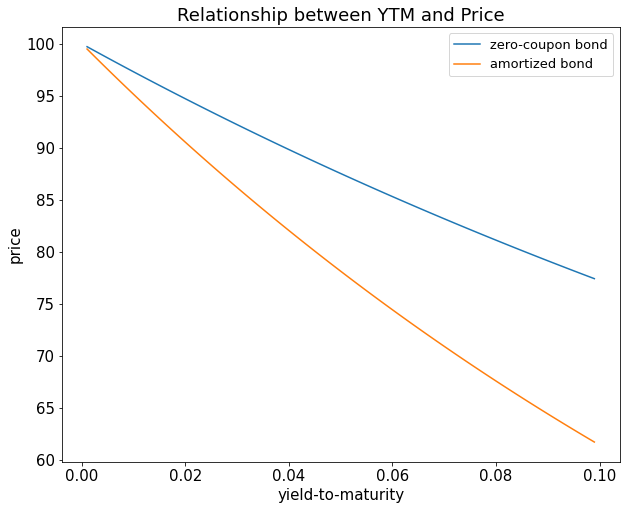

In [18]:
T = 5

ylds_grid = np.arange(0.001,.10,.001)
price_grid = pd.DataFrame(dtype=float, index=ylds_grid, columns=['amortized','zero-coupon'])

for i,y in enumerate(ylds_grid):
    price_grid.loc[y,'zero-coupon'] = price_vanilla_bond(0,T,y)
    price_grid.loc[y,'amortized'] = price_vanilla_bond(.2,T,y) - price_vanilla_bond(0,T,y,face=100)
    
price_grid.plot(figsize=(10,8));

legend_labels = ['zero-coupon bond','amortized bond']

plt.xlabel('yield-to-maturity')
plt.ylabel('price')
plt.legend(legend_labels)
plt.title('Relationship between YTM and Price')
plt.show()

## <span style="color:red">3.4 - 3.5</span>

#### Careful

The problem asked for (Macauley) duration--NOT modified duration.

Both are reported below, in case evaluating for partial credit.

To further illustrate the issue in 3.3, the duration and convexity of the zero-coupon bond are reported below, but that was not required.

In [19]:
wts = (10*spot['discount factor'] / p_amort)

sensitivity = pd.DataFrame((wts * spot.index).sum(),index=['amortized bond'],columns=['duration'])
sensitivity['convexity'] = (wts * spot.index**2).sum()

sensitivity.style.format('{:.2f}')

,duration,convexity
amortized bond,2.67,9.20


### Pedagogical Point

#### Comparison to zero-coupon, as conceptually considered in 3.3

Estimates support what we reasoned above.

In [20]:
sensitivity.loc['zero-coupon bond',:] = [T,T**2]

display(sensitivity.style.format('{:.2f}'))
sensitivity.drop(index=['zero-coupon bond'],inplace=True);

,duration,convexity
amortized bond,2.67,9.20
zero-coupon bond,5.00,25.00


## <span style="color:red">3.6</span>

Calculate the duration of the quoted 5-year Treasury in one of two ways:
* using the CF grid from 2.1, similar to calculating duration in W.2.
* using the closed-form solution for modified duration of a vanilla bond, then converting to macauley duration, (similar to the method in HW 4.)

Both are shown below.

#### Reminder
Usually, in using the cashflow approach to calculate the duration, we need to be careful to use the modeled price, not the quoted price, in getting the present-value weights.

However, here both are the same, as we have extracted spot discount factors that are an exact fit for these quoted prices.

In [21]:
def duration_closed_formula(tau, ytm, cpnrate=None, freq=2):

    if cpnrate is None:
        cpnrate = ytm
        
    y = ytm/freq
    c = cpnrate/freq
    T = tau * freq
        
    if cpnrate==ytm:
        duration = (1+y)/y  * (1 - 1/(1+y)**T)
        
    else:
        duration = (1+y)/y - (1+y+T*(c-y)) / (c*((1+y)**T-1)+y)

    duration /= freq
    
    return duration

In [22]:
DURATION_VIA_STYLIZED_FORMULA = False

modeled_px = (CF.iloc[-1,:].values * spot['discount factor']).sum()
wts = CF.iloc[-1,:].values * spot['discount factor'] / modeled_px
sensitivity.loc['quoted 5-year Treasury','duration'] = (wts * spot.index).sum()
sensitivity.loc['quoted 5-year Treasury','convexity'] = (wts * spot.index**2).sum()

if DURATION_VIA_STYLIZED_FORMULA:
    sensitivity.loc['quoted 5-year Treasury','duration'] = duration_closed_formula(5,quotes['ytm'].iloc[-1],quotes['coupon rate'].iloc[-1]/100)


sensitivity['price'] = [p_amort, quotes['price'].iloc[-1]]
sensitivity['dollar duration'] = sensitivity['duration'] * sensitivity['price']

sensitivity.style.format('{:.2f}')

,duration,convexity,price,dollar duration
amortized bond,2.67,9.20,89.38,238.81
quoted 5-year Treasury,4.60,22.27,99.42,456.94


Recalling our duration hedging formula,
$$n_j = -n_i\frac{D_{\$,i}}{D_{\$,j}}$$
then we get the answer in the table below.

#### Careful: Scale by dollars (i.e. use dollar duration)

The question asks how many **short** positions of the 5-year treasury for each position in the amortized bond. It is not asking about the dollars hedged but rather the positions hedged.

#### Careful: Asks for number of short positions

So no problem if the negative sign is not listed, as this is presumed in the question. Also fine if it is listed for emphasis.

In [23]:
sensitivity.loc['quoted 5-year Treasury','short vanilla per amortized bond'] = sensitivity.loc['amortized bond','dollar duration'] / sensitivity.loc['quoted 5-year Treasury','dollar duration']
sensitivity.style.format('{:.2f}')

,duration,convexity,price,dollar duration,short vanilla per amortized bond
amortized bond,2.67,9.20,89.38,238.81,nan
quoted 5-year Treasury,4.60,22.27,99.42,456.94,0.52


***

# 4 Expectations Hypothesis

Continue using the rates from Dec 30, 2022 introduced in Problem 2 above.

## 4.1 (5pts)

Use the Expectations Hypothesis to get a forecast the one-year spot rate that will be available in December of the following four years, (2023, 2024, 2025, 2026.)

## 4.2 (5pts)

Based on evidence we reviewed of the Expectations Hypothesis, do you expect the forecasts above are too high or low? Explain.

## 4.3 (5pts)

Suppose that the following month, January 2023, we observe that the forward rates have increased. Is it likely that the future spot rates (in Jan 2023, 2024, 2025, 2026) will increase as well? Explain.

## 4.4 (5pts)

As of December 2022, describe (conceptually) the "carry trade" you would recommend an investor implement..

***

# <span style="color:red">Solution 4</span>

#### <span style="color:green">RUBRIC</span>

4.1 (5 points)
  - 0 points: Blank or essentially no meaningful progress
  - 3 points: Answer indicated that forecasts should be based on forward rates, but one or more forecast was incorrect.
  - 5 points: All 5 forecasts must be correct within a rounding error.

4.2 (5 points)
  - 0 points: Blank or incorrect answer
  - 3 points: Correct answer but no explanation.
  - 5 points: Correct answer with explanation.

4.3 (5 points) Question can be understood despite typo
  - 0 points: Blank or incorrect answer
  - 3 points: Correct answer but no explanation.
  - 5 points: Correct answer with explanation.

4.4 (5 points)
  - 0 points: Blank or incorrect and irrelevant answer
  - 3 points: Correct answer but no explanation.
  - 5 points: Correct answer with explanation.

## <span style="color:red">4.1</span>

The Expectations Hypothesis says that today's forward rate is the best forecast of the future spot rate:

$$\mathbb{E}_t\left[r(T_1,T_2)\right] = f(t,T_1,T_2)$$

**Thus, we simply use the forward rates calculated in problem 2.5.**

In [24]:
forward[['semiannual','continuous']].iloc[1::2]

,semiannual,continuous
maturity,,
1.002053,0.046961,0.046961
2.004107,0.040721,0.040721
3.003422,0.036346,0.036346
4.002738,0.038354,0.038354
5.002053,0.034836,0.034836


The problem didn't specify compounding, so any reasonable compounding choice is fine.

## <span style="color:red">4.2</span>

The forecasts are likely too high.

In W.5., we saw evidence that forward rates are useful as forecasts, but that they are (on average) higher than the future one-year spot rates. This was one of the pieces of evidence that the Expectations Hypothesis is false.

## <span style="color:red">4.3</span>

Yes, **on average** they increase, but it is not **likely**.

In W.5., in the Dynamic Tests of the EH, Fact 2 ran a regression showing that innovations to the forward rate are positively correlated with changes to the future spot (positive betas) but that it is an extremely weak relationship (r-squared near zero.)

## <span style="color:red">4.4</span>

We saw that an upward sloping spot curve predicts profits to going long the long-term bond and shorting the short-term bond, due to the failure of the Expectations Hypothesis. (See HW 5).

**Thus, given the downward sloping spot curve in Dec 2022, the appropriate carry trade would be to set up the following position:**
* short long-term (i.e. 5-year) bonds
* long short-term (i.e. 1-year) bonds

See the Dynamic Tests of the EH in W.5. for more. This trade carries interest-rate risk, but those tests indicate it has positive expected PnL.

***

# 5 Long-Short Convergence Trade

Consider a long-short convergence trade on `2019-08-29`.

* Both securities mature on **2020-08-15**.
* One is a 30-year **bond** and the other is a 10-year **note**.

Find data needed for the analysis in `treasury_ts_2020-08-15.xlsx`.

Note:
* Use the YTM as given in the field `TDYLD`. Multiply by 365.25 to convert it to an annual yield.
* Use the (Macauley) duration given in `TDDURATN`, divided by 365.25 to annualize it.

## 5.1 (10pts)

Display a table showing the two securities as of `2019-08-29`:
* issue date
* maturity date
* coupon rate
* clean price (taken as average of bid and ask)
* dirty price
* duration (Macauley)
* modified duration
* ytm

## 5.2 (5pts)

On this date, `2019-08-29`, the YTM spread is at a 5-year low.

Calculate the YTM spread (bond YTM minus note YTM).
* Report this number.

Explain conceptually what trade might make sense if we believe this spread will converge back to zero.
* Which security will you go long and which will you go short?

## 5.3 (5pts)
Describe conceptually the risk in this trade.
* What risks are present in this trade? 
* Is it an arbitrage? 

Answer both over the next month and over the next year, until maturity.

## 5.4 (10pts)

Suppose you use \\$1 million of equity capital on the long position, leveraged 50x to buy \\$50 million of the long position. Assume any short position will also be levered 50x. 

*You do not need to worry about the details of this financing. One could view this as a 2\% capital requirement on both the long and short positions, possibly due to haircuts and brokerage requirements. There is no difference between financing rates on the long and short positions, (so no need to consider repo rate vs brokerage account interest rate.)*

**Calculate...**
* the number of long contracts 
* the number of short contracts such that the trade is initialized with zero duration
* the dollar value of assets and of equity in each side of the trade.

In calculating the number of contracts, assume face value of \\$100 each.

## 5.5 (10pts)

Using the concept of modified duration, how much profit or loss (PnL) would you expect to make for every basis point of convergence in the spread? 

Specifically, assume the convergence is symmetric: the long position's ytm goes down 0.5bp and the short position's ytm goes up 0.5bp. 

**Using this approximation, specify the PnL of the long position, the short position, and the net total for a 1bp convergence.**

## 5.6 (5pts)

Calculate the profit (or loss) on the position as of `2019-10-01`.

Show this separately for the long position, the short position, and the net.

Note that no coupon is paid between the trade being set up and this date; thus, the PnL is simply a matter of the position's prices.

## 5.7 (5pts)

Does the actual PnL above make sense in light of the duration-based PnL-per-bp calculated above? Give two reasons these numbers may not be aligned.

***

# <span style="color:red">Solution 5</span>

#### <span style="color:green">RUBRIC</span>

5.1 (10 points)
  - A field is considered correct if it is close, within a rounding error
  - Max(0, 10 - # incorrect fields)

5.2 (5 points)
  - 0 points: Blank or essentially no meaningful progress
  - 3 points: Correct number reported or correct conceptual explanation.
  - 5 points: Correct number reported and correct conceptual explanation.

5.3 (5 points)
  - 0 points: Blank or essentially no meaningful progress
  - 3 points: One correct explanation
  - 5 points: Both explanations correct

5.4 (10 points)
  - A field is considered correct if it is close, within a rounding error
  - There are 4 fields
  - 0 if blank, otherwise Max(0, 10 – 2 x # incorrect fields) 

5.5 (10 points)
  - 0 points: Blank or essentially no meaningful progress
  - 2 points:  There is a reasonable attempt that is significantly incorrect in any way
  - 10 points: All fields correct within rounding error

5.6 (5 points)
  - A field is considered correct if it is close, within a rounding error (3 total fields)
  - Max(0, 5 - 2 x # incorrect fields)

5.7 (5 points)
  - 0 points: Blank or incorrect answer
  - 3 points: One correct reason.
  - 5 points: Two correct reasons.


### Other functions

These functions are not published, thus you will not be able to re-run this code.

In [25]:
sys.path.insert(0, '../dev')
from tradebondpair import *

In [26]:
filepath_tsdata = f'../data/treasury_ts_2020-08-15.xlsx'
info = pd.read_excel(filepath_tsdata,sheet_name='info',index_col=0)
tsdata = pd.read_excel(filepath_tsdata,sheet_name='database')
tsdata.columns = tsdata.columns.str.upper()

In [27]:
DATE0 = '2019-08-29'
DATE1 = '2019-10-01'

## <span style="color:red">5.1</span>

In [28]:
tab = get_table(info,tsdata,DATE0)
tab

kytreasno,204074,206169
issue date,1990-08-15 00:00:00,2010-08-15 00:00:00
maturity date,2020-08-15 00:00:00,2020-08-15 00:00:00
coupon rate,8.75,2.625
type,bond,note
bid,106.71875,100.78125
ask,106.742188,100.804688
accrued interest,0.33288,0.099864
clean price,106.730469,100.792969
dirty price,107.063349,100.892833
duration,0.943518,0.957295


## <span style="color:red">5.2</span>

In [29]:
spread = tab.loc['ytm'].diff().values[1]
display(f'Spread (bond ytm minus note ytm) is {spread:.2%}.')

'Spread (bond ytm minus note ytm) is 0.12%.'

If we believe the spread will converge to zero, then we hypothesize that
* bond YTM goes up
* note YTM goes down

**Thus, we should build a positions that goes**
* short the bond
* long the note

In [30]:
keyLong = tab.loc['ytm'].astype('float64').idxmax()
keyShort = tab.loc['ytm'].astype('float64').idxmin()

## <span style="color:red">5.3</span>

It is **not** an arbitrage trade.

The risk in the trade is that the ytm spread may diverge further.

Given that the securities mature in a year, there is no guarantee or particular reason to believe convergence will happen within a month.

As for the one-year horizon,
* One could argue that it is essentially an arbitrage if **held for a year**, until maturity.
* But one could also note it is not quite an arbitrage as there will be market microstructure / liquidity reasons that this spread will not converge to zero. (Though its lack of convergence will have little price impact as the time-to-maturity gets small.)

## <span style="color:red">5.4</span>

In [31]:
LONGEQUITY = 1e6

Here we make use of the function in Solution 2.

To do so, set up a dataframe with the financing info. 
* haircuts are symmetric and 2\%
* repo rates are equal and unspecified, but cancel.

But this financing dataframe is unnecessary in general and is only specified here to make quick use of a preexisting function.

In [32]:
financing = pd.DataFrame(dtype='float64',index=['long','short'])
financing['haircut'] = [.02,.02]
financing['repo'] = [.00,.00]

balsheet, fmt = trade_balance_sheet(prices=tab.loc['dirty price'], durations=tab.loc['duration'], haircuts=financing['haircut'], long_equity=LONGEQUITY, key_long=keyLong, key_short=keyShort)
balsheet.style.format(fmt,na_rep='')

,equity,assets,contracts
206169,"$1,000,000.00","$50,000,000.00","495,575.34"
204074,"$-1,014,601.50","$-50,730,074.95","-473,832.32"


## <span style="color:red">5.5</span>

In [33]:
spread_convergence = .0001

pnl_spread_1bp, fmt_dict = pnl_spread_trade(spread_convergence,tab.loc['modified duration'], tab.loc['dirty price'], balsheet['contracts'])
pnl_spread_1bp.style.format(fmt_dict,na_rep='')

,ytm change,modified duration,price,contracts,pnl
kytreasno,,,,,
204074,-0.0050%,0.94,$107.06,"-473,832.32","$-2,373.58"
206169,0.0050%,0.95,$100.89,"495,575.34","$-2,372.15"
total,,,,,"$-4,745.72"


### <span style="color:red">Pedagogical</span>

The table below shows the entire convergence (approximated with duration) in a table splitting out the long pnl from the short pnl.

In [34]:
spread_convergence = tab.loc['ytm'].diff().dropna().abs().values[0]

pnl_spread_converges, fmt_dict = pnl_spread_trade(spread_convergence,tab.loc['modified duration'], tab.loc['dirty price'], balsheet['contracts'])
pnl_spread_converges.style.format(fmt_dict,na_rep='')

,ytm change,modified duration,price,contracts,pnl
kytreasno,,,,,
204074,-0.0608%,0.94,$107.06,"-473,832.32","$-28,868.89"
206169,0.0608%,0.95,$100.89,"495,575.34","$-28,851.49"
total,,,,,"$-57,720.38"


### <span style="color:red">Pedagogical</span>

The plot below shows how the actual spread evolved.

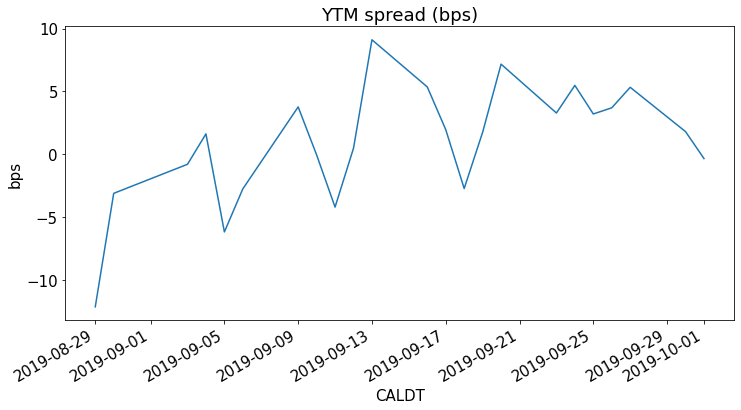

In [35]:
spread = get_spread_bps(tsdata)
spread = spread[keyLong]
spread.rename('ytm spread (bps)',inplace=True)
spread.loc[DATE0:DATE1].plot(ylabel='bps',title='YTM spread (bps)');

## <span style="color:red">5.6</span>

The data on the final date:

In [36]:
tab_final = get_table(info,tsdata,DATE1)
tab_final

kytreasno,204074,206169
issue date,1990-08-15 00:00:00,2010-08-15 00:00:00
maturity date,2020-08-15 00:00:00,2020-08-15 00:00:00
coupon rate,8.75,2.625
type,bond,note
bid,105.960938,100.679688
ask,105.984375,100.710938
accrued interest,1.117527,0.335258
clean price,105.972656,100.695312
dirty price,107.090183,101.030571
duration,0.853155,0.866945


In [37]:
prices = pd.concat([tab.loc['dirty price'], tab_final.loc['dirty price']],axis=1)

In [38]:
pnl = pd.concat([balsheet['contracts'],tab_final.loc['dirty price']-tab.loc['dirty price']],axis=1).rename(columns={'dirty price':'change in price'})
pnl['pnl'] = pnl['contracts'] * pnl['change in price']
pnl.loc['total','pnl'] = pnl['pnl'].sum()
pnl.style.format({'contracts':'{:,.2f}','change in price':'{:.2f}','pnl':'${:,.2f}'},na_rep='')

,contracts,change in price,pnl
206169,"495,575.34",0.14,"$68,259.44"
204074,"-473,832.32",0.03,"$-12,714.93"
total,,,"$55,544.51"


### <span style="color:red">Pedagogical: Return on equity</span>

In [39]:
roe = pnl.loc['total','pnl'] / balsheet['equity'].abs().sum()

display(f'Total return over ~ 1 month on initial gross assets is {roe:.2%}.')

'Total return over ~ 1 month on initial gross assets is 2.76%.'

## <span style="color:red">5.7</span>

The PnL approximated by duration will not exactly align with the PnL realized on 2019-10-01 even though the spread largely converges.

Differences will persist for a few reasons:
* Duration is a linear approximation to the pricing--it ignores nonlinearity, (part of which would be captured by convexity.)
* Duration changes over time. The measured duration at the start of the period applies for that particular level of rates and that time-to-maturity. As each of these parameters change, the expected P